# Title: "Wine Quality Prediction Project"

# Authors: Autumn Heyman, Erin Weaver, Georgia Miller

# File Setup Tasks

## Import Libraries

In [41]:
library("tidyverse")
library("caret")
library("lmtest")
library("magrittr")
library("dplyr")
library("tidyr")
library("popbio")
library("e1071")
library("PerformanceAnalytics")
library("corrplot")
library("corpcor")
library("MASS")
library("brant")
library("effects")

ERROR: Error in library("brant"): there is no package called ‘brant’


## Set Working Directory

In [ ]:
*** can be manually overridden by selecting source file location from the session menu ***

## Import Dataset

In [6]:
wineqt <- read.csv("WineQT.csv")
head(wineqt)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5


# Data Wrangling

## Drop Id Column

In [7]:
wine_subset <- wineqt[, c(1,2,3,4,5,6,7,8,9,10,11,12)]

## Recode into Three Groups

In [8]:
wine_subset$qualityR <- NA
wine_subset$qualityR [wine_subset$quality==3] <- 0
wine_subset$qualityR [wine_subset$quality==4] <- 0
wine_subset$qualityR [wine_subset$quality==5] <- 1
wine_subset$qualityR [wine_subset$quality==6] <- 1
wine_subset$qualityR [wine_subset$quality==7] <- 2
wine_subset$qualityR [wine_subset$quality==8] <- 2
head(wine_subset)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,qualityR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,1
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,1


## Drop Quality

In [9]:
wine_wrangled <- wine_subset[, c(1,2,3,4,5,6,7,8,9,10,11,13)]
head(wine_wrangled)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,qualityR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1


## Check All Data Types 

In [11]:
str(wine_wrangled)

'data.frame':	1143 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 6.7 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.58 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.097 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 15 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.28 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.54 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 9.2 ...
 $ qualityR            : num  1 1 1 1 1 1 1 2 2 1 ...


# Exploratory Analysis

### Summarizing the Dataset

In [12]:
summary(wine_wrangled)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 4.600   Min.   :0.1200   Min.   :0.0000   Min.   : 0.900  
 1st Qu.: 7.100   1st Qu.:0.3925   1st Qu.:0.0900   1st Qu.: 1.900  
 Median : 7.900   Median :0.5200   Median :0.2500   Median : 2.200  
 Mean   : 8.311   Mean   :0.5313   Mean   :0.2684   Mean   : 2.532  
 3rd Qu.: 9.100   3rd Qu.:0.6400   3rd Qu.:0.4200   3rd Qu.: 2.600  
 Max.   :15.900   Max.   :1.5800   Max.   :1.0000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 21.00       1st Qu.:0.9956  
 Median :0.07900   Median :13.00       Median : 37.00       Median :0.9967  
 Mean   :0.08693   Mean   :15.62       Mean   : 45.91       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 61.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :68.00       Max.   :289.00  

# Assumption Testing

## Assumption 1: The Dependent Variable is Ordered
### Results of Test: Pass.

## Assumption 2: One or more of the independent variables are either continuous, categorical, or ordinal
### Results of Test: Pass.

## Assumption 3: Absence of Multicollinearity

### Correlation Matrix

In [13]:
wine_wrangled$qualityR <- as.numeric(wine_wrangled$qualityR)
corr_matrix <- cor(wine_wrangled)
corr_matrix

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,qualityR
fixed.acidity,1.00000000,-0.250728322,0.67315725,0.171830535,0.10788857,-0.164830793,-0.11062837,0.68150088,-0.68516260,0.17459183,-0.07505485,0.12543453
volatile.acidity,-0.25072832,1.000000000,-0.54418694,-0.005751097,0.05633626,-0.001962479,0.07774772,0.01651152,0.22149152,-0.27607860,-0.20390927,-0.35557608
citric.acid,0.67315725,-0.544186937,1.00000000,0.175814854,0.24531249,-0.057589104,0.03687111,0.37524326,-0.54633914,0.33123176,0.10625034,0.25696751
residual.sugar,0.17183054,-0.005751097,0.17581485,1.000000000,0.07086311,0.165338797,0.19079003,0.38014695,-0.11695894,0.01747450,0.05842061,0.05199733
chlorides,0.10788857,0.056336259,0.24531249,0.070863112,1.00000000,0.015280458,0.04816316,0.20890071,-0.27775907,0.37478389,-0.22991709,-0.10634301
free.sulfur.dioxide,-0.16483079,-0.001962479,-0.05758910,0.165338797,0.01528046,1.000000000,0.66109287,-0.05415032,0.07280371,0.03444512,-0.04709483,-0.03325624
total.sulfur.dioxide,-0.11062837,0.077747722,0.03687111,0.190790035,0.04816316,0.661092872,1.00000000,0.05017483,-0.05912572,0.02689368,-0.18816480,-0.07728294
density,0.68150088,0.016511520,0.37524326,0.380146952,0.20890071,-0.054150318,0.05017483,1.00000000,-0.35277462,0.14313929,-0.49472690,-0.13191392
pH,-0.68516260,0.221491518,-0.54633914,-0.116958936,-0.27775907,0.072803706,-0.05912572,-0.35277462,1.00000000,-0.18549903,0.22532220,-0.10392646
sulphates,0.17459183,-0.276078597,0.33123176,0.017474504,0.37478389,0.034445122,0.02689368,0.14313929,-0.18549903,1.00000000,0.09442113,0.19532723


### Results of Test: 

### Correlation Plots

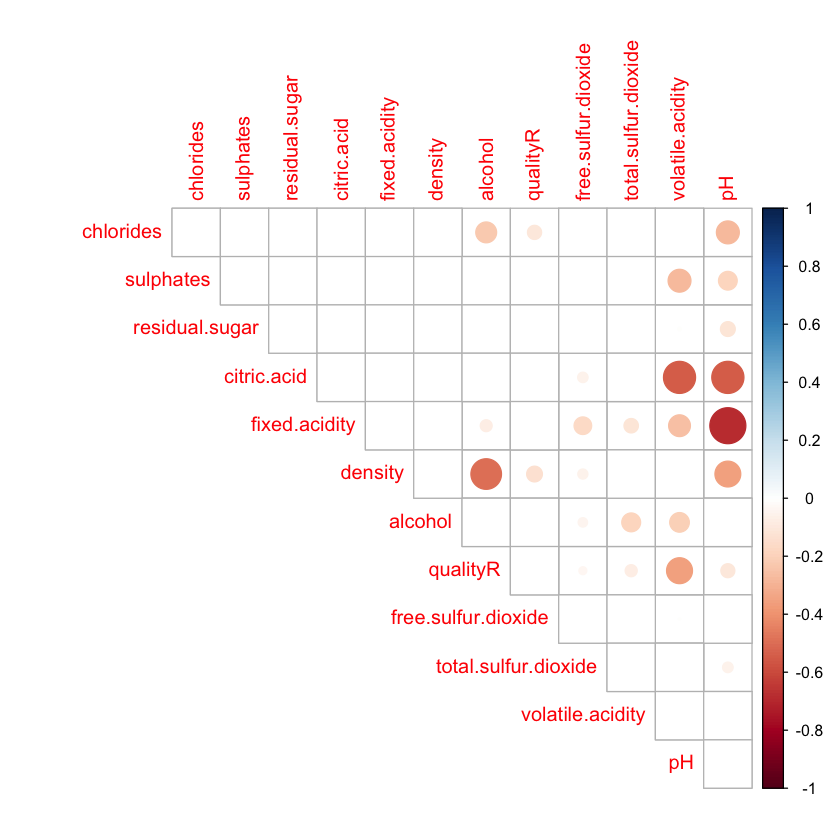

In [14]:
corrplot(corr_matrix, type="upper", order="hclust", p.mat = corr_matrix, sig.level = 0.01, insig="blank")

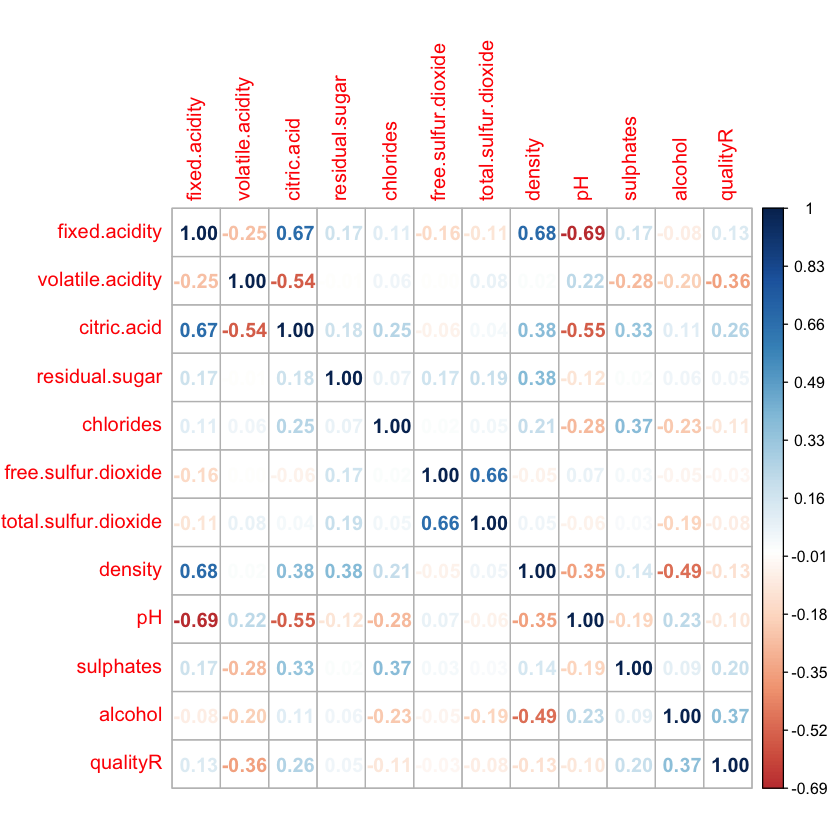

In [15]:
corrplot(corr_matrix, method = "number", is.corr = FALSE)

### Pearson's Test

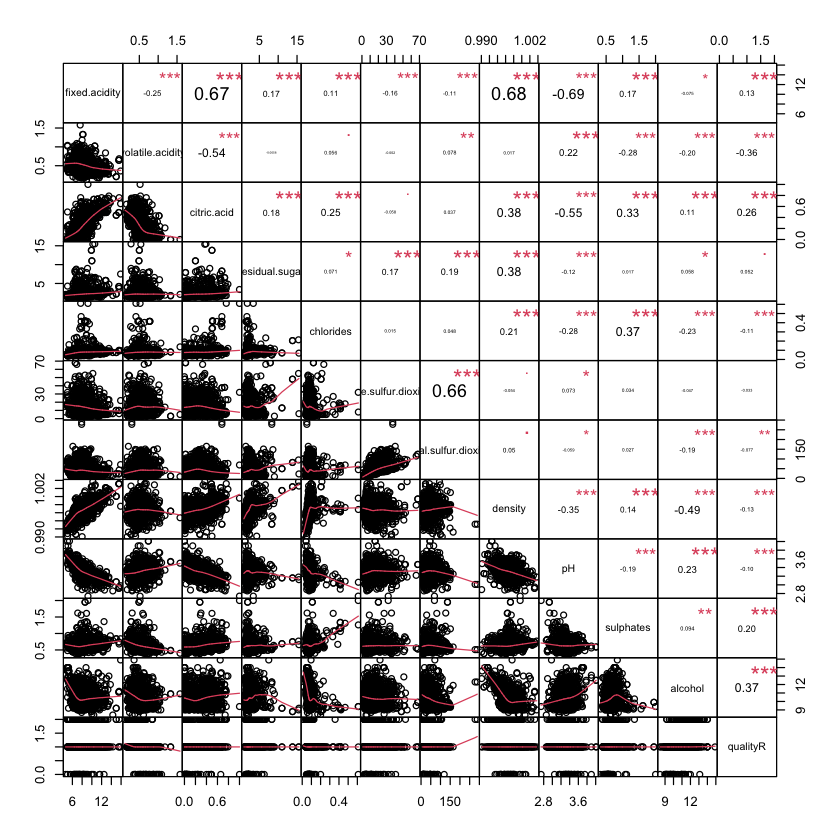

In [16]:
chart.Correlation(wine_wrangled, histogram=FALSE, method="pearson")

In [17]:
####OLD CODE TO REVIEW AND POSSIBLY ADD HERE###

## Assumption 4: Proportional Odds

In [18]:
brant(model)

ERROR: Error in brant(model): could not find function "brant"


### Results of Test: Pass

In [20]:
### Box Tidwell goes here###

In [ ]:
#####NAME#####

In [21]:
wine1 <- wineqt %>% dplyr::select_if(is.numeric)
predictors <- colnames(wine1)
wine1 <- wine1 %>% mutate(logit=log(probabilities/(1-probabilities))) %>%
gather(key= "predictors", value="predictor.value", -logit)

ERROR: Error: Problem with `mutate()` column `logit`.
[34mℹ[39m `logit = log(probabilities/(1 - probabilities))`.
[31m✖[39m object 'probabilities' not found


ERROR while rich displaying an object: Error: At least one layer must contain all faceting variables: `predictors`.
* Plot is missing `predictors`
* Layer 1 is missing `predictors`
* Layer 2 is missing `predictors`

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_

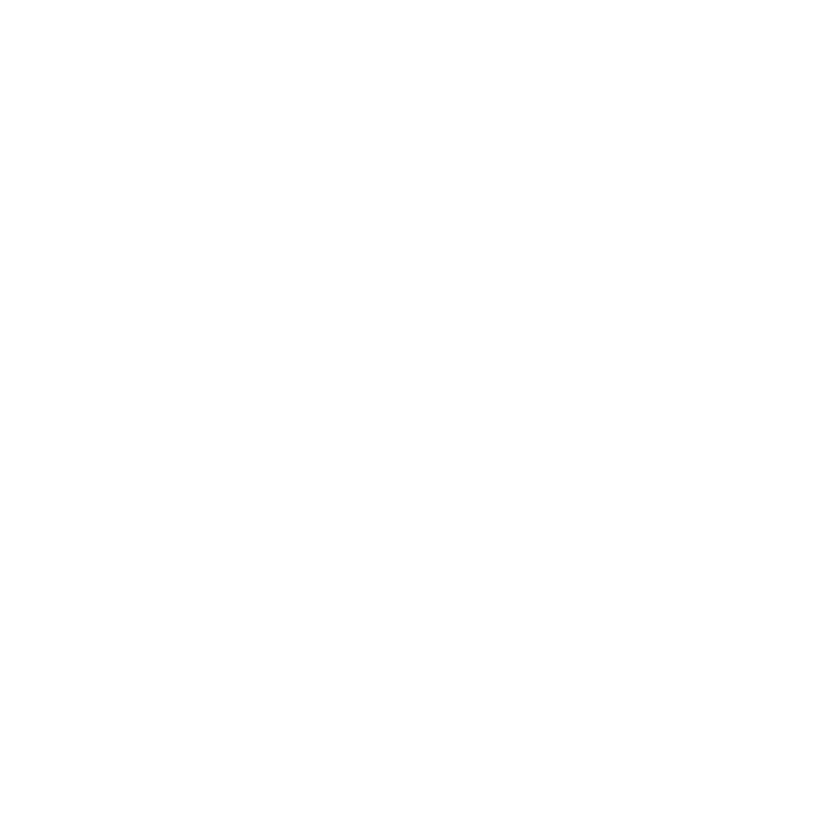

In [22]:
ggplot(wine1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

## Assumption #5: Absence of Influential Outliers

In [24]:
infl <- influence.measures(mylogit)
summary(infl)

ERROR: Error in influence.measures(mylogit): object 'mylogit' not found


### Results indicate no evidence of **influential** outliers

### Box Plot Method

### All Box Plots

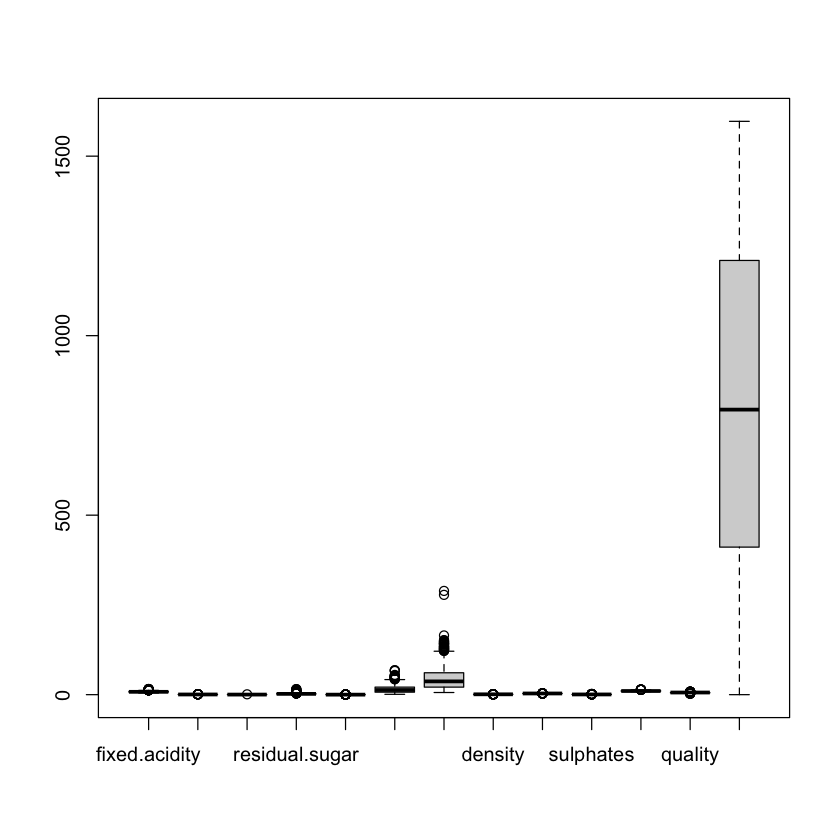

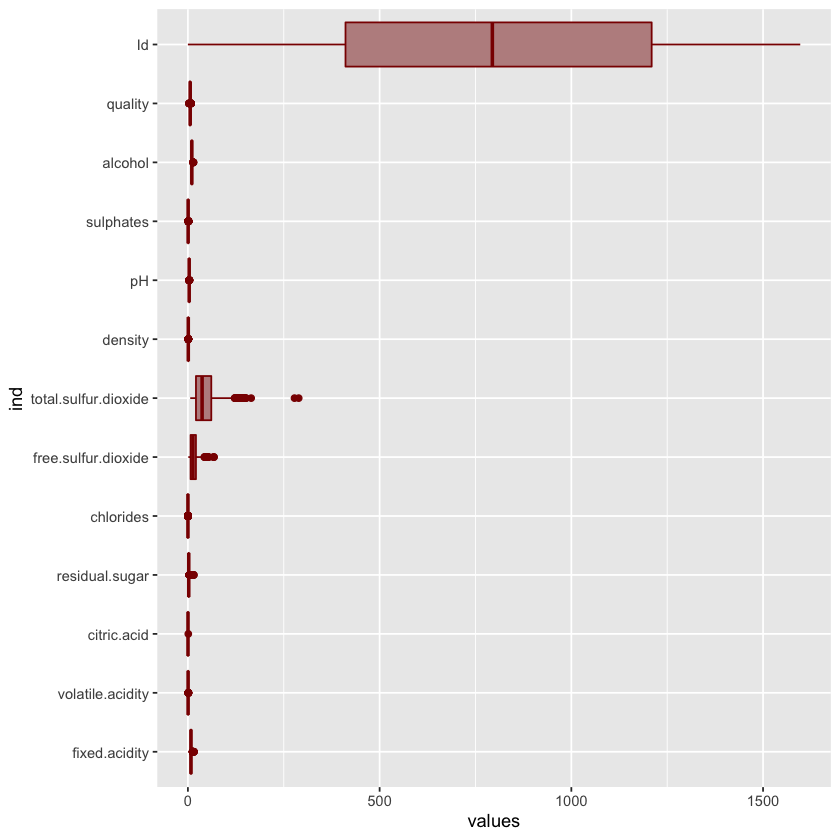

In [27]:
boxplot(wine1)
ggplot(stack(wine1), aes(x = ind, y = values))+
  geom_boxplot(fill='rosybrown', color="darkred") +
  coord_flip()

### Results: All variables have outliers

In [ ]:
# Correcting for Violation of Assumptions

In [28]:
## Corrections for Violation of Multicollinearity

In [29]:
## Corrections for Violation of Logit Linearity

# Creating a Base Model

## Define the Order of the Dependent Variable

In [31]:
wine_wrangled$qualityR = factor(wine_wrangled$qualityR, levels = c("0", "1", "2"), ordered = TRUE) 

## Dividing Data into Training and Test Set

### Random Sampling

In [32]:
samplesize = 0.60*nrow(wine_wrangled)
set.seed(100)
index = sample(seq_len(nrow(wine_wrangled)), size = samplesize)

### Creating Training and Test Set

In [33]:
datatrain = wine_wrangled[index,]
datatest = wine_wrangled[-index,]

## Create the Ordinal Logistic Regression Model

In [34]:
model= polr(qualityR ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides + 
            free.sulfur.dioxide + total.sulfur.dioxide + density + pH + sulphates + alcohol, 
            data = wine_wrangled, Hess = TRUE)

In [35]:
summary(model)

Call:
polr(formula = qualityR ~ fixed.acidity + volatile.acidity + 
    citric.acid + residual.sugar + chlorides + free.sulfur.dioxide + 
    total.sulfur.dioxide + density + pH + sulphates + alcohol, 
    data = wine_wrangled, Hess = TRUE)

Coefficients:
                          Value Std. Error  t value
fixed.acidity         -0.330008   0.082411  -4.0044
volatile.acidity      -4.405687   0.661679  -6.6583
citric.acid            0.845356   0.790894   1.0689
residual.sugar        -0.060996   0.068254  -0.8937
chlorides             -8.934343   2.368258  -3.7725
free.sulfur.dioxide    0.001840   0.011773   0.1563
total.sulfur.dioxide  -0.004261   0.003804  -1.1202
density              273.446919   1.637315 167.0094
pH                    -4.146601   0.863993  -4.7993
sulphates              1.777010   0.544503   3.2635
alcohol                1.110960   0.094846  11.7133

Intercepts:
    Value    Std. Error t value 
0|1 261.2794   1.6791   155.6049
1|2 268.2894   1.6758   160.0944

Residua

## Significance Table of Coefficients and Intercepts

In [36]:
summary_table <- coef(summary(model))
pval <- pnorm(abs(summary_table[, "t value"]),lower.tail = FALSE)* 2
summary_table <- cbind(summary_table, "p value" = round(pval,3))
summary_table

,Value,Std. Error,t value,p value
fixed.acidity,-0.330007685,0.082411311,-4.0043980,0.000
volatile.acidity,-4.405687281,0.661679176,-6.6583436,0.000
citric.acid,0.845355599,0.790893893,1.0688610,0.285
residual.sugar,-0.060996277,0.068253771,-0.8936690,0.371
chlorides,-8.934343441,2.368257602,-3.7725387,0.000
free.sulfur.dioxide,0.001840378,0.011772759,0.1563251,0.876
total.sulfur.dioxide,-0.004261068,0.003803822,-1.1202068,0.263
density,273.446919191,1.637314577,167.0093964,0.000
pH,-4.146600904,0.863993383,-4.7993434,0.000
sulphates,1.777009838,0.544502584,3.2635471,0.001


In [37]:
## Explanation of Results:

# Making Predictions

## Compute Confusion Matrix and Misclassification Error

In [38]:
predict.quality = predict(model,datatest)
table(datatest$qualityR, predict.quality)
mean(as.character(datatest$qualityR) != as.character(predict.quality))

   predict.quality
      0   1   2
  0   0  18   0
  1   1 352  18
  2   0  46  23

[1] 0.1812227

### Interpretation of the Confusion Matrix 

In the test dataset, 0 times the below average "0" wine quality category is identified correctly.
We observe that the model identifies below average wine poorly.
This is because there is an inadequate representation of "below average" wine quality category in the traning
dataset.

In the test dataset, 352 times the average "1" wine quality category is identified correctly. 

In the test dataset, 23 times the above average "2" wine quality category is identified correctly.

 
Using the confusion matrix, we find that the misclassification error for our model is 18%.

## Interpretation Using Plots: Plotting the Effects 

### Fixed Acidity


fixed.acidity effect (probability) for 0
fixed.acidity
        4.6         7.4          10          13          16 
0.003745705 0.009383534 0.021852374 0.056715093 0.139277364 

fixed.acidity effect (probability) for 1
fixed.acidity
      4.6       7.4        10        13        16 
0.8026304 0.9036027 0.9393070 0.9284919 0.8551744 

fixed.acidity effect (probability) for 2
fixed.acidity
        4.6         7.4          10          13          16 
0.193623937 0.087013809 0.038840610 0.014793010 0.005548189 

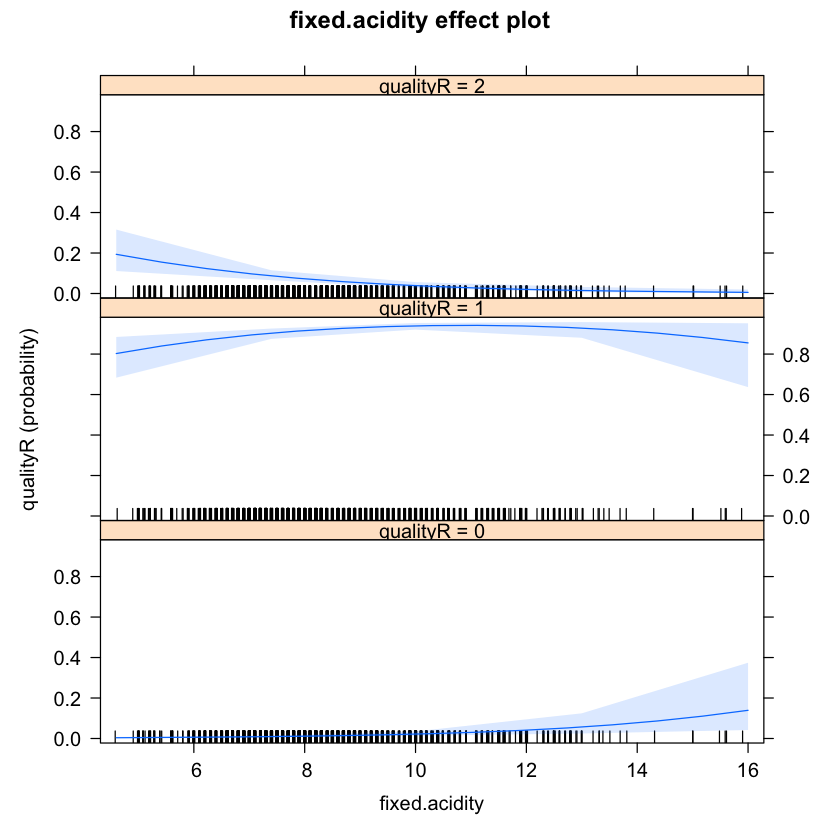

In [42]:
Effect(focal.predictors = "fixed.acidity",model)
plot(Effect(focal.predictors = "fixed.acidity",model))

### Volatile Acidity


volatile.acidity effect (probability) for 0
volatile.acidity
        0.1         0.5         0.8           1           2 
0.001909428 0.011022147 0.040115153 0.091627614 0.892041480 

volatile.acidity effect (probability) for 1
volatile.acidity
      0.1       0.5       0.8         1         2 
0.6774838 0.9140440 0.9387396 0.8995018 0.1078493 

volatile.acidity effect (probability) for 2
volatile.acidity
         0.1          0.5          0.8            1            2 
0.3206067810 0.0749338450 0.0211452954 0.0088705950 0.0001092469 

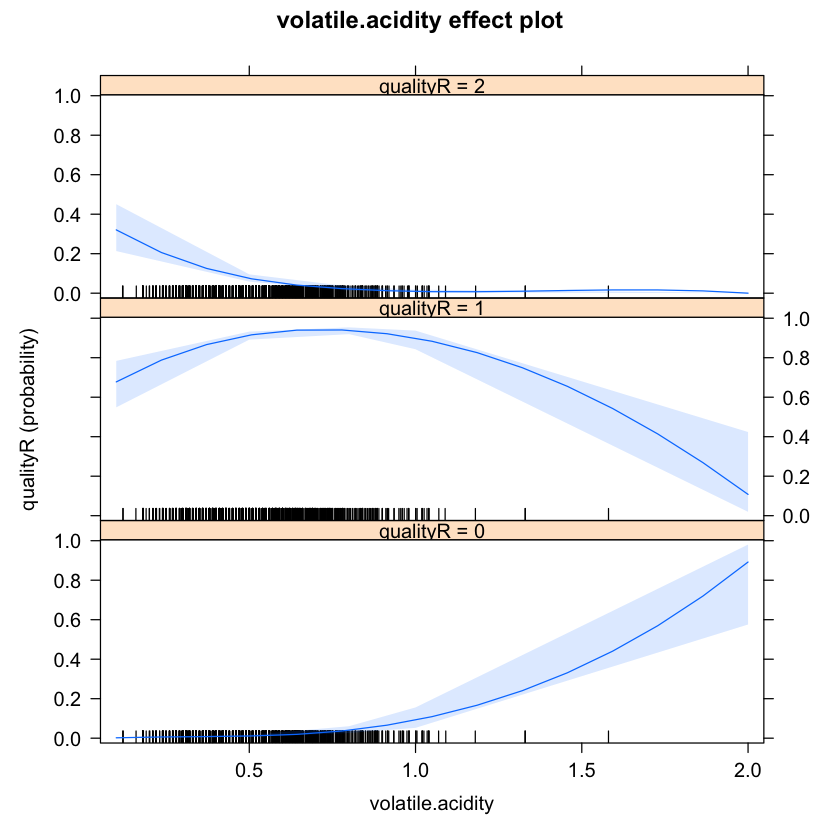

In [44]:
Effect(focal.predictors = "volatile.acidity",model)
plot(Effect(focal.predictors = "volatile.acidity",model))

### Citric Acid


citric.acid effect (probability) for 0
citric.acid
          0         0.2         0.5         0.8           1 
0.015799763 0.013374963 0.010410120 0.008097103 0.006846212 

citric.acid effect (probability) for 1
citric.acid
        0       0.2       0.5       0.8         1 
0.9309580 0.9241877 0.9105535 0.8923234 0.8773555 

citric.acid effect (probability) for 2
citric.acid
         0        0.2        0.5        0.8          1 
0.05324227 0.06243738 0.07903634 0.09957945 0.11579834 

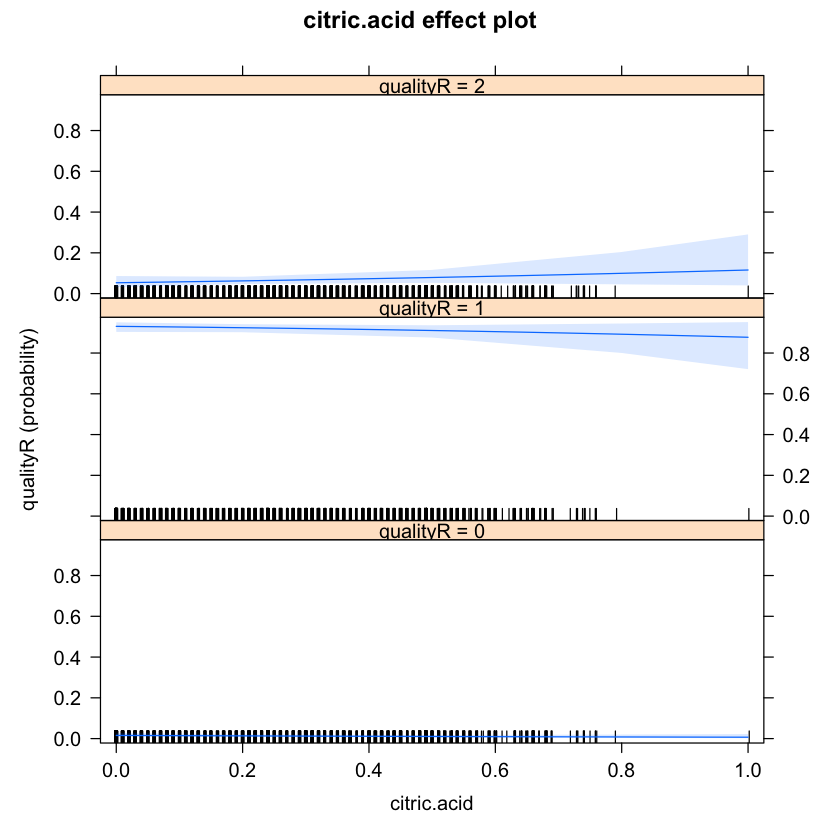

In [46]:
Effect(focal.predictors = "citric.acid",model)
plot(Effect(focal.predictors = "citric.acid",model))

### Residual Sugar


residual.sugar effect (probability) for 0
residual.sugar
       0.9          5          8         10         20 
0.01144997 0.01465561 0.01754684 0.01977843 0.03580439 

residual.sugar effect (probability) for 1
residual.sugar
      0.9         5         8        10        20 
0.9162425 0.9281205 0.9343380 0.9373955 0.9404610 

residual.sugar effect (probability) for 2
residual.sugar
       0.9          5          8         10         20 
0.07230751 0.05722390 0.04811520 0.04282605 0.02373458 

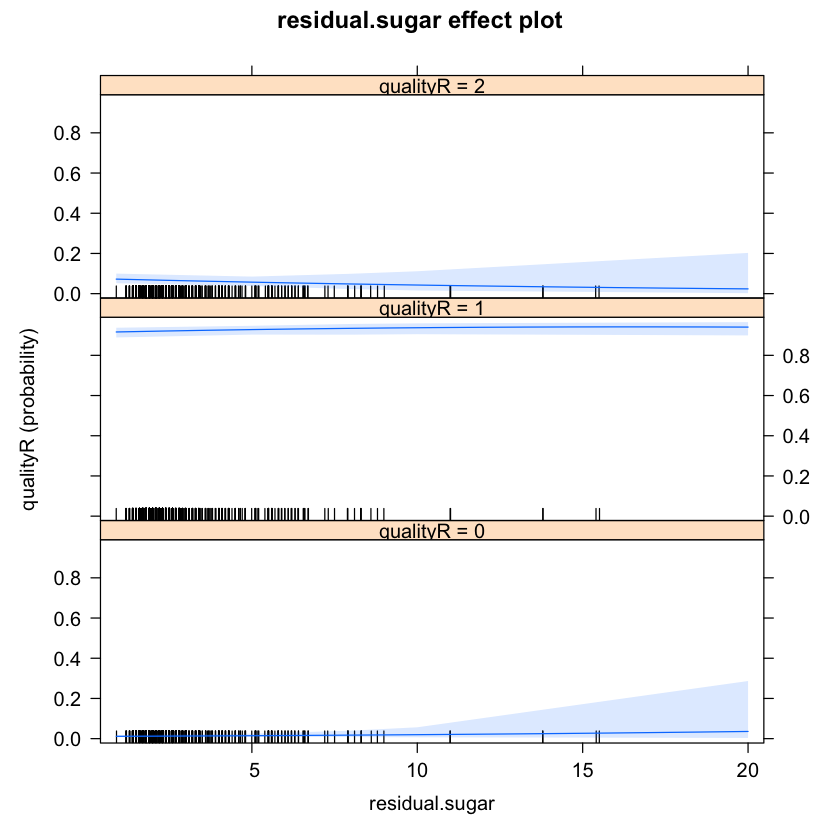

In [47]:
Effect(focal.predictors = "residual.sugar",model)
plot(Effect(focal.predictors = "residual.sugar",model))

### Chlorides


chlorides effect (probability) for 0
chlorides
       0.01         0.2         0.3         0.5         0.6 
0.006393624 0.033943836 0.079067827 0.338897397 0.556068864 

chlorides effect (probability) for 1
chlorides
     0.01       0.2       0.3       0.5       0.6 
0.8705700 0.9410061 0.9105265 0.6593446 0.4432109 

chlorides effect (probability) for 2
chlorides
        0.01          0.2          0.3          0.5          0.6 
0.1230364234 0.0250500509 0.0104056661 0.0017580099 0.0007202097 

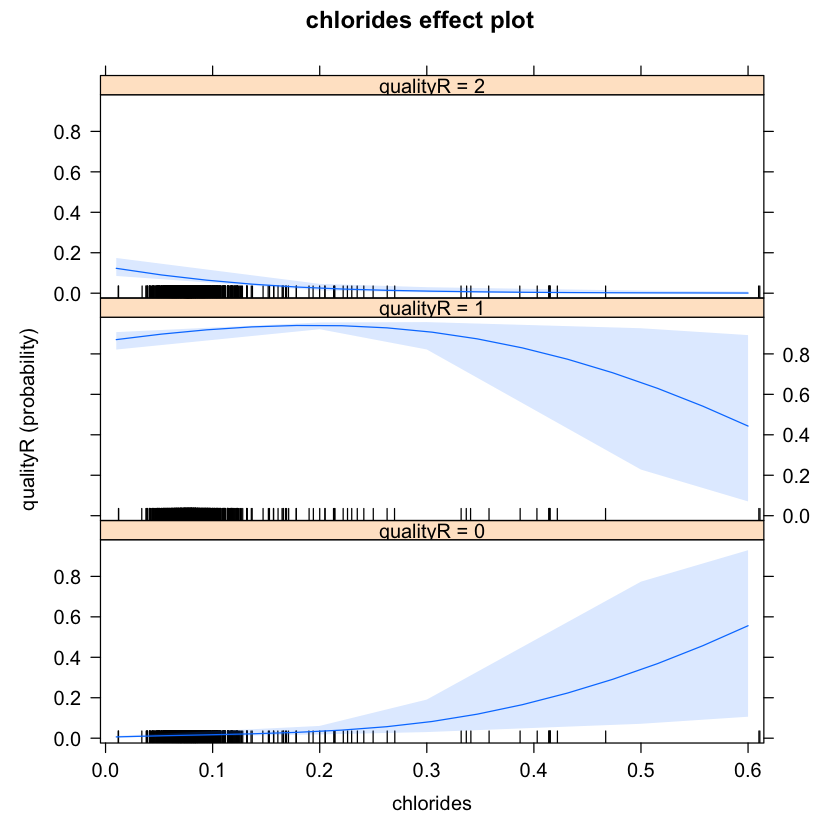

In [48]:
Effect(focal.predictors = "chlorides",model)
plot(Effect(focal.predictors = "chlorides",model))

### Free Sulfur Dioxide


free.sulfur.dioxide effect (probability) for 0
free.sulfur.dioxide
         1         20         30         50         70 
0.01297336 0.01253314 0.01230741 0.01186791 0.01144394 

free.sulfur.dioxide effect (probability) for 1
free.sulfur.dioxide
        1        20        30        50        70 
0.9227561 0.9210611 0.9201367 0.9182204 0.9162128 

free.sulfur.dioxide effect (probability) for 2
free.sulfur.dioxide
         1         20         30         50         70 
0.06427051 0.06640574 0.06755585 0.06991166 0.07234326 

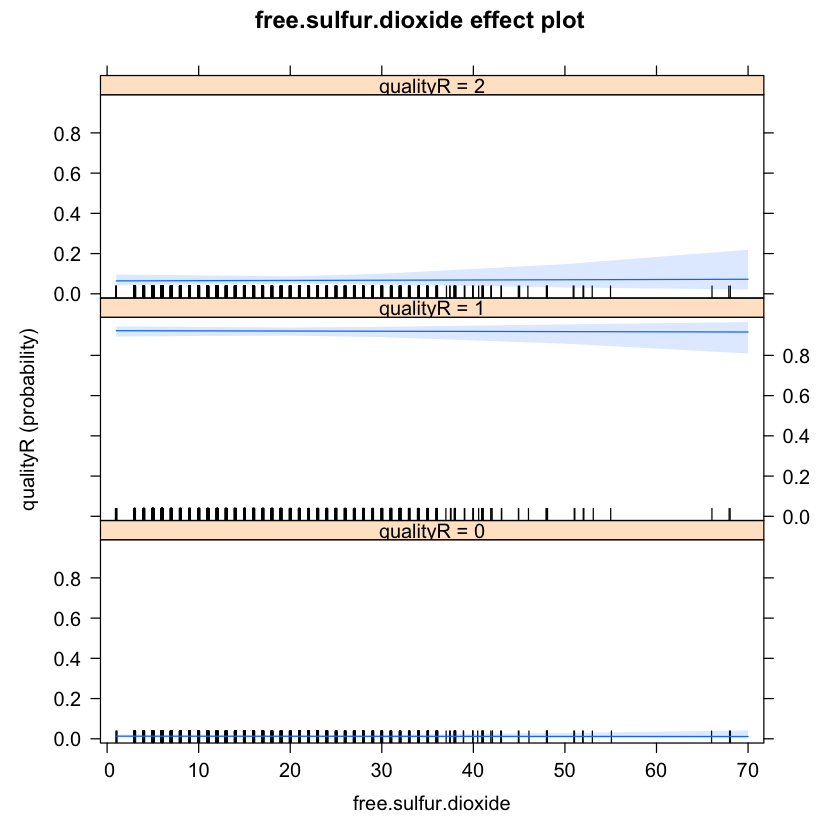

In [49]:
Effect(focal.predictors = "free.sulfur.dioxide",model)
plot(Effect(focal.predictors = "free.sulfur.dioxide",model))

### Total Sulfur Dioxide


total.sulfur.dioxide effect (probability) for 0
total.sulfur.dioxide
         6         80        100        200        300 
0.01067861 0.01457942 0.01585581 0.02407693 0.03640297 

total.sulfur.dioxide effect (probability) for 1
total.sulfur.dioxide
        6        80       100       200       300 
0.9121382 0.9279106 0.9310830 0.9406217 0.9402578 

total.sulfur.dioxide effect (probability) for 2
total.sulfur.dioxide
         6         80        100        200        300 
0.07718324 0.05750995 0.05306119 0.03530132 0.02333926 

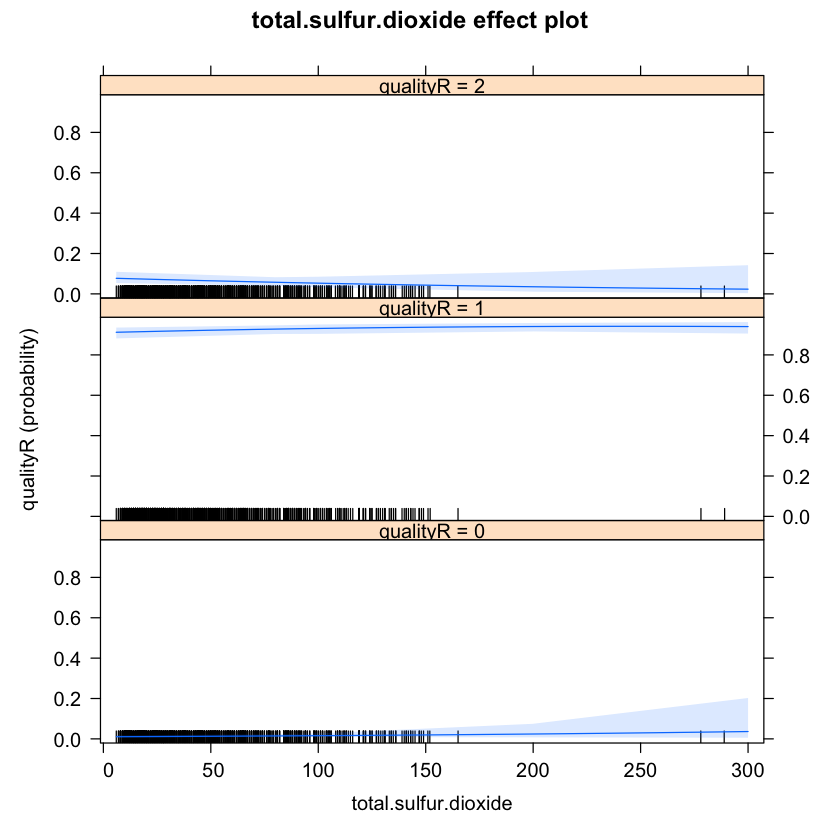

In [51]:
Effect(focal.predictors = "total.sulfur.dioxide",model)
plot(Effect(focal.predictors = "total.sulfur.dioxide",model))

### Density


density effect (probability) for 0
density
     0.9901      0.9935      0.9969           1       1.004 
0.072720490 0.030021754 0.012067829 0.005205832 0.001749727 

density effect (probability) for 1
density
   0.9901    0.9935    0.9969         1     1.004 
0.9158988 0.9416366 0.9191119 0.8476614 0.6582922 

density effect (probability) for 2
density
    0.9901     0.9935     0.9969          1      1.004 
0.01138067 0.02834160 0.06882027 0.14713276 0.33995810 

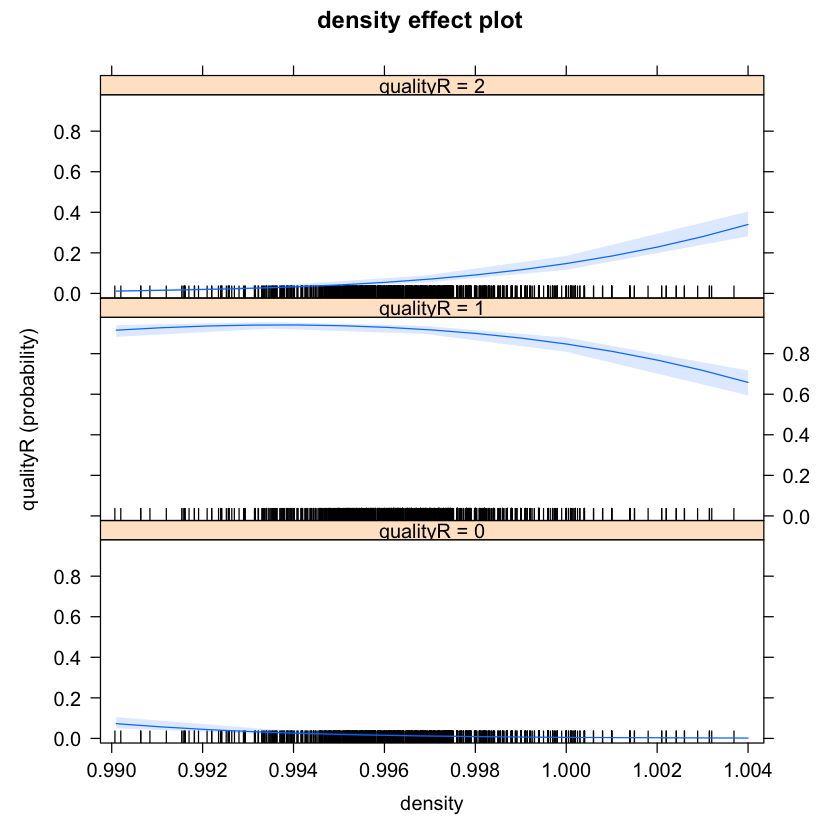

In [52]:
Effect(focal.predictors = "density",model)
plot(Effect(focal.predictors = "density",model))

### pH


pH effect (probability) for 0
pH
        2.7         3.1         3.4         3.7           4 
0.001014512 0.005305499 0.018168836 0.060328184 0.182164511 

pH effect (probability) for 1
pH
      2.7       3.1       3.4       3.7         4 
0.5283748 0.8499380 0.9353146 0.9258050 0.8137988 

pH effect (probability) for 2
pH
        2.7         3.1         3.4         3.7           4 
0.470610725 0.144756509 0.046516572 0.013866804 0.004036736 

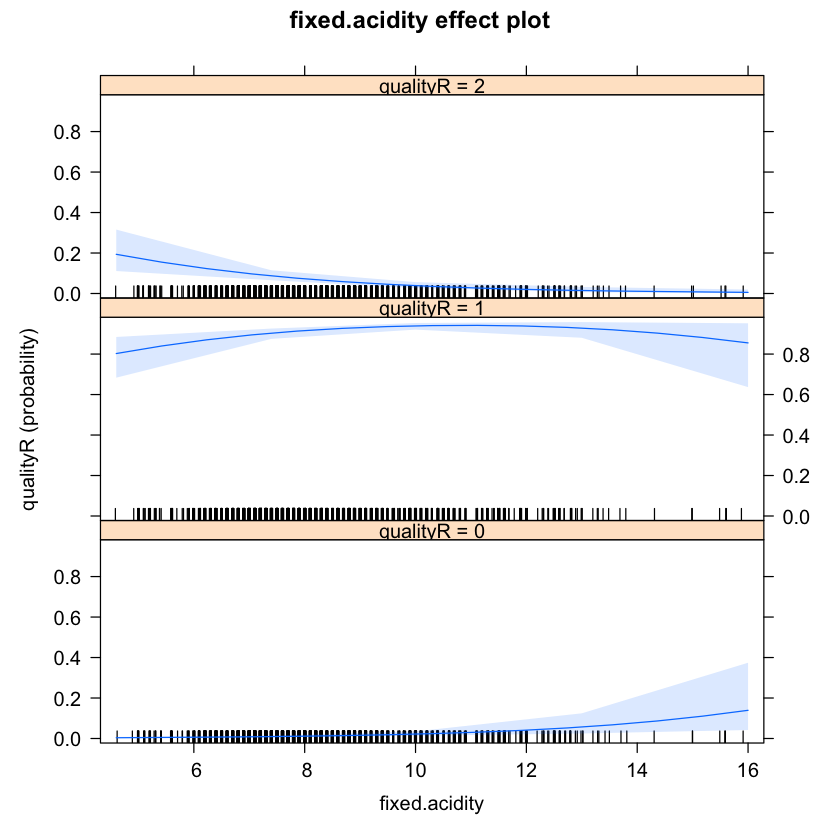

In [53]:
Effect(focal.predictors = "pH",model)
plot(Effect(focal.predictors = "fixed.acidity",model))

### Sulphates 


sulphates effect (probability) for 0
sulphates
       0.33        0.75         1.2         1.6           2 
0.022393042 0.010742981 0.004857529 0.002392169 0.001176583 

sulphates effect (probability) for 1
sulphates
     0.33      0.75       1.2       1.6         2 
0.9396887 0.9125054 0.8390598 0.7240936 0.5649491 

sulphates effect (probability) for 2
sulphates
      0.33       0.75        1.2        1.6          2 
0.03791823 0.07675165 0.15608264 0.27351427 0.43387434 

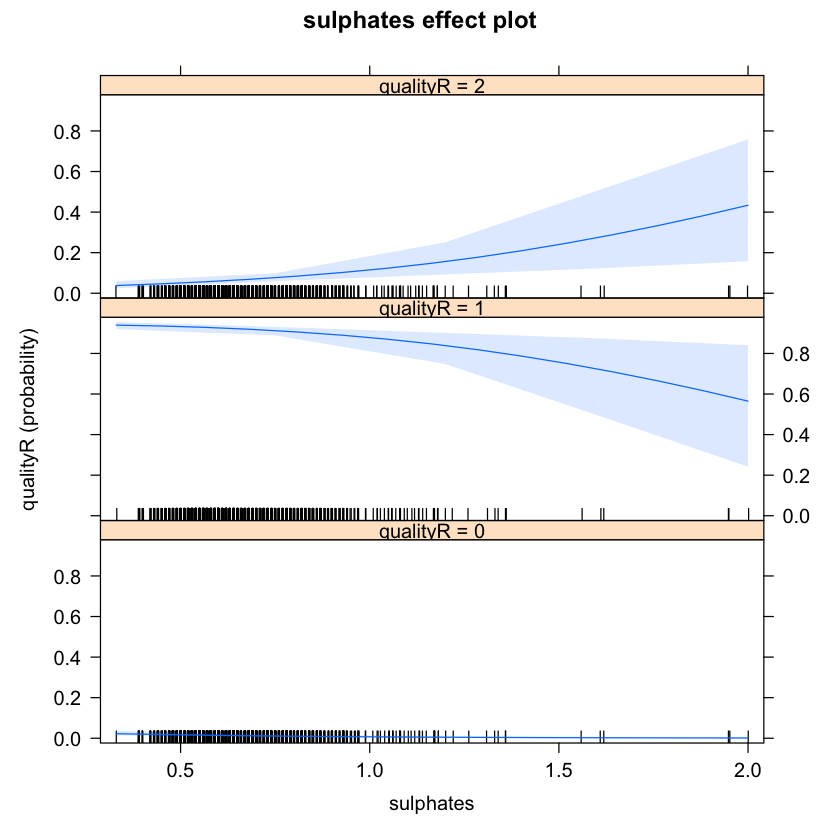

In [54]:
Effect(focal.predictors = "sulphates",model)
plot(Effect(focal.predictors = "sulphates",model))

### Alcohol


alcohol effect (probability) for 0
alcohol
         8.4           10           12           13           15 
1.100732e-01 2.048170e-02 2.261531e-03 7.457238e-04 8.089082e-05 

alcohol effect (probability) for 1
alcohol
       8.4         10         12         13         15 
0.88268075 0.93813031 0.71289786 0.45180143 0.08215834 

alcohol effect (probability) for 2
alcohol
        8.4          10          12          13          15 
0.007246012 0.041387990 0.284840614 0.547452842 0.917760774 

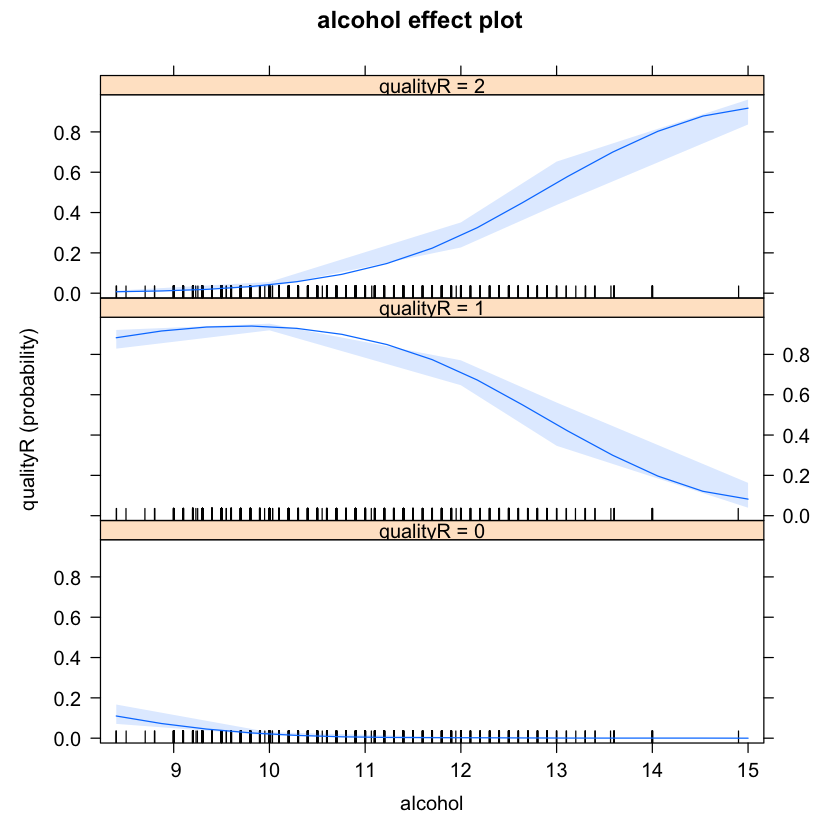

In [56]:
Effect(focal.predictors = "alcohol",model)
plot(Effect(focal.predictors = "alcohol",model))